In [39]:
import numpy as np
import matplotlib.pyplot as plt
import random

seed = 81
random.seed(seed)

# flajolet-martin wird benutzt, um zu schaetzen, wie viele UNTERSCHIEDLICHE Elemente schon gesehen wurden
# idee: jedes mal, wenn du ein element siehst, wirfst du den wuerfel auf eine ganz besondere art und weise
# je mehr unterschiedliche, desto mehr unterschiedliche wuerfel wuerfe
# je mehr wuerfel wuerfe, desto wahrscheinlicher, dass etwas unwahrscheinliches passiert (folge 1,2,3,4,5,6)
# je rarer das beobachtete ereignis, desto eher wurden schon ganz viele unterschiedliche wuerfe geworfen
# also ganz viele unterschiedliche elemente gesehen

def flajolet_martin(elements, N=32):
    
    # Hash function fuer arme
    random_a = random.randint(1, 1000)
    random_b = random.randint(0, 1000)
    
    length_longest_tail = 0
    
    for element in elements:
        
        # nur werte modulo 2^N koennen wir als N bits darstellen
        hash_value = (random_a * element + random_b) % (2**N)
        hash_string = "{0:b}".format(hash_value)
        
        # padding fals nicht N bits erreicht wurden
        hash_string = "1" * (N - len(hash_string)) + hash_string
        
        assert(len(hash_string) == N)

        length_longest_tail = max(length_longest_tail, count_trailing_zeros(hash_string))
    
    return 2**length_longest_tail

In [40]:
def count_trailing_zeros(string):
    
    for i in range(len(string) - 1, -1, -1):
        if string[i] == "1":
            return len(string) - i - 1
        
    return len(string)

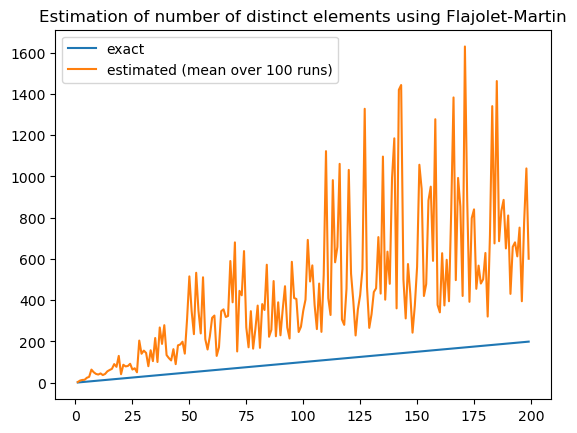

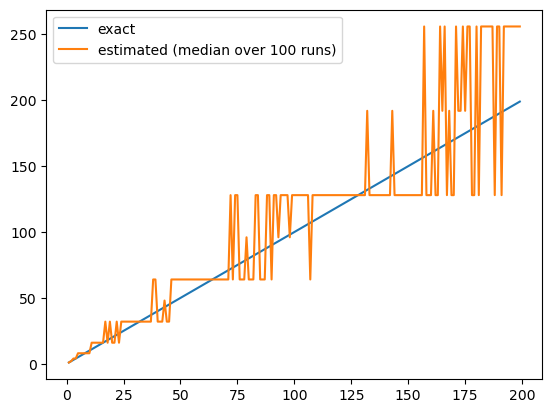

In [51]:
xs = list(range(1, 200))
exact_number = []

# wir muessen Flajolet-Martin mittlen, ansonsten sind die ergebnisse nicht aussagekraeftig
runs_per_list = 100
estimated_number = np.zeros((len(xs), runs_per_list))

for num_elements in xs:
    elements = list(range(1, num_elements + 1))
    exact_number.append(num_elements)
    
    for i in range(runs_per_list):
        estimated_number[num_elements - 1, i] = (flajolet_martin(elements))
    
plt.title("Estimation of number of distinct elements using Flajolet-Martin")
plt.plot(xs, exact_number, label="exact")
plt.plot(xs, np.mean(estimated_number, axis=1), label=f"estimated (mean over {runs_per_list} runs)")
plt.legend()
plt.show()

plt.plot(xs, exact_number, label="exact")
plt.plot(xs, np.median(estimated_number, axis=1), label=f"estimated (median over {runs_per_list} runs)")
plt.legend()
plt.show()

Flajolet-Martin kann die Anzahl unterschiedlicher Elemente nur mit einer Zweier-Potenz schaetzen